In [1]:
'''
In statistics, polynomial regression is a form of regression analysis
in which the relationship between the independent variable x and the dependent variable y
is modelled as an nth degree polynomial in x. (wikipedia)
'''

'\nIn statistics, polynomial regression is a form of regression analysis\nin which the relationship between the independent variable x and the dependent variable y\nis modelled as an nth degree polynomial in x. (wikipedia)\n'

In [2]:
from google.colab import files  #www.kaggle.com/crawford/80-cereals
uploaded = files.upload()

Saving cereal.csv to cereal.csv


In [3]:
import io
import pandas as pd

cereal = pd.read_csv(io.BytesIO(uploaded['cereal.csv']))

In [5]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [7]:
#predicting the relationship between 'sugars' and 'rating'

cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<function matplotlib.pyplot.show(*args, **kw)>

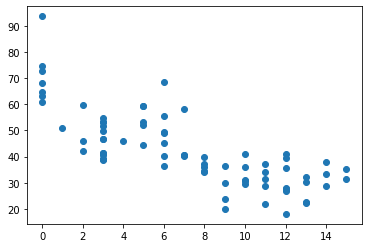

In [8]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by = ['sugars'], inplace = True)
cereal2.reset_index(drop = True, inplace = True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x, y)
plt.show

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [12]:
import numpy as np
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision =2)
print(np.concatenate((pred.reshape(len(pred), 1),
                      y_test.reshape(len(y_test),1)), 1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]
